<a href="https://colab.research.google.com/github/Nikiram-C/IPL-Data-Analysis/blob/main/iplfinal1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
import cufflinks as cf
cf.go_offline(connected=True)

In [4]:
import plotly.express as ps
import plotly.graph_objects as go

In [5]:
init_notebook_mode(connected=True)

**Description of Data**

In [6]:
df_complete=pd.read_csv('matches.csv')
df_complete.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

**Data Cleaning**

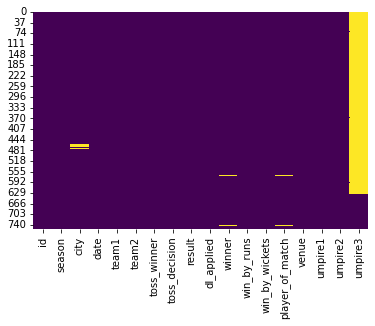

In [8]:
null_values=df_complete.isnull()
sns.heatmap(data=null_values,cbar=False,cmap='viridis')

In [9]:
df_complete.drop(['umpire2','umpire1','umpire3'],axis=1,inplace=True)
df_complete.drop('city',axis=1,inplace=True)
df_complete.dropna(inplace=True)

In [10]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 755
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               752 non-null    int64 
 1   season           752 non-null    int64 
 2   date             752 non-null    object
 3   team1            752 non-null    object
 4   team2            752 non-null    object
 5   toss_winner      752 non-null    object
 6   toss_decision    752 non-null    object
 7   result           752 non-null    object
 8   dl_applied       752 non-null    int64 
 9   winner           752 non-null    object
 10  win_by_runs      752 non-null    int64 
 11  win_by_wickets   752 non-null    int64 
 12  player_of_match  752 non-null    object
 13  venue            752 non-null    object
dtypes: int64(5), object(9)
memory usage: 88.1+ KB


In [11]:
df_complete.head()

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


**All the Venues where IPL matches are held**

In [12]:
df_complete.replace(['Punjab Cricket Association IS Bindra Stadium, Mohali','M. A. Chidambaram Stadium','Feroz Shah Kotla Ground','M. Chinnaswamy Stadium','Rajiv Gandhi Intl. Cricket Stadium'],['Punjab Cricket Association Stadium, Mohali','MA Chidambaram Stadium, Chepauk','Feroz Shah Kotla','M Chinnaswamy Stadium','Rajiv Gandhi International Stadium, Uppal'],inplace=True)
df_complete['venue'].unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla', 'Punjab Cricket Association Stadium, Mohali',
       'Green Park', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International S

**Franchises that have won the IPL championship**

In [13]:
df_complete.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True)
print(df_complete['winner'].unique())

['Sunrisers Hyderabad' 'Rising Pune Supergiants' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Delhi Daredevils' 'Gujarat Lions' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'Delhi Capitals']


**Number of tosses won by each team**

In [22]:
df_toss=df_complete.groupby('toss_winner')['id'].count().reset_index()
df_toss.rename(columns={'id':'Number'},inplace=True)
df_toss.sort_values(by=['Number'],ascending=False)

,toss_winner,Number
8,Mumbai Indians,98
7,Kolkata Knight Riders,92
0,Chennai Super Kings,89
5,Kings XI Punjab,81
12,Royal Challengers Bangalore,80
3,Delhi Daredevils,79
10,Rajasthan Royals,78
13,Sunrisers Hyderabad,46
1,Deccan Chargers,43
9,Pune Warriors,20


**Comparision of Matches Won by teams electing to Bowl or Bat first after winning toss**

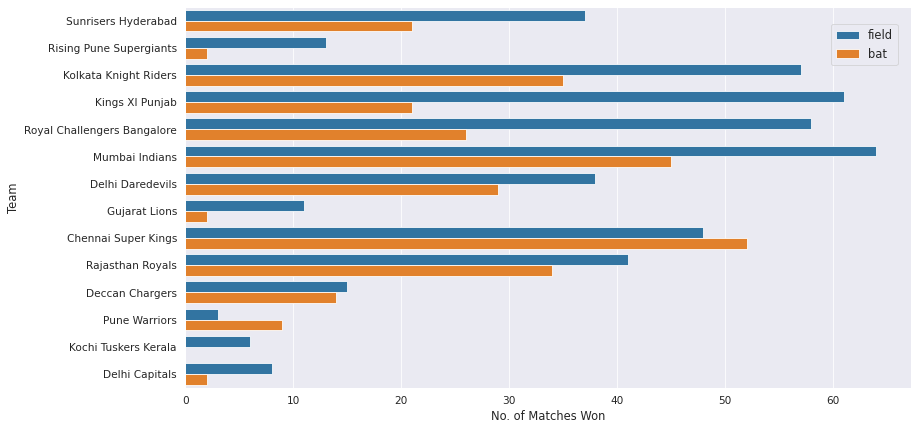

In [14]:
plt.figure(figsize=(13,7))
sns.set_style('darkgrid')
sns.set_color_codes(palette='dark')
sns.set_context('paper',font_scale=1.2)
fig=sns.countplot(y='winner',data=df_complete,hue='toss_decision')
fig.set(xlabel='No. of Matches Won',ylabel='Team')
plt.legend(bbox_to_anchor=(0.99,0.97),fontsize='medium',fancybox=True)
plt.show()


**Number of man of the matches won by players**

In [25]:
df_pom=df_complete.groupby('player_of_match')['id'].count().reset_index()
df_pom.rename(columns={'id':'Number'},inplace=True)

In [27]:

df_pom[df_pom['Number']>5].iplot(kind='line',x='player_of_match',y='Number',xTitle='Player Name',yTitle='No. of Man of the matches')


In [28]:
fig=ps.histogram(data_frame=df_complete,x='venue',color='season',height=800,width=900,color_discrete_sequence=ps.colors.qualitative.Pastel)
fig.show()

**RCB batting and bowling Analysis**

In [29]:
df_del=pd.read_csv('deliveries.csv')

In [30]:
df_del.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


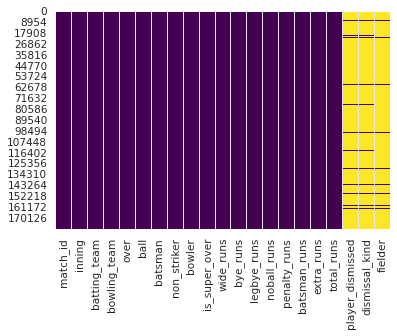

In [31]:
df_nullvals=df_del.isnull()
sns.heatmap(df_nullvals,cmap='viridis',cbar=False)
df_del.drop('fielder',axis=1,inplace=True)

In [32]:
df_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

**Most Number of Boundaries hit by RCB Batsmens**

In [33]:
df_rcb=df_del[(df_del['batting_team']=='Royal Challengers Bangalore') | (df_del['bowling_team']=='Royal Challengers Bangalore')]
df_rcbbatting=df_rcb[df_rcb['batting_team']=='Royal Challengers Bangalore']
df_boundaries=df_rcbbatting[(df_rcbbatting['batsman_runs']==4) | (df_rcbbatting['batsman_runs']==6)]

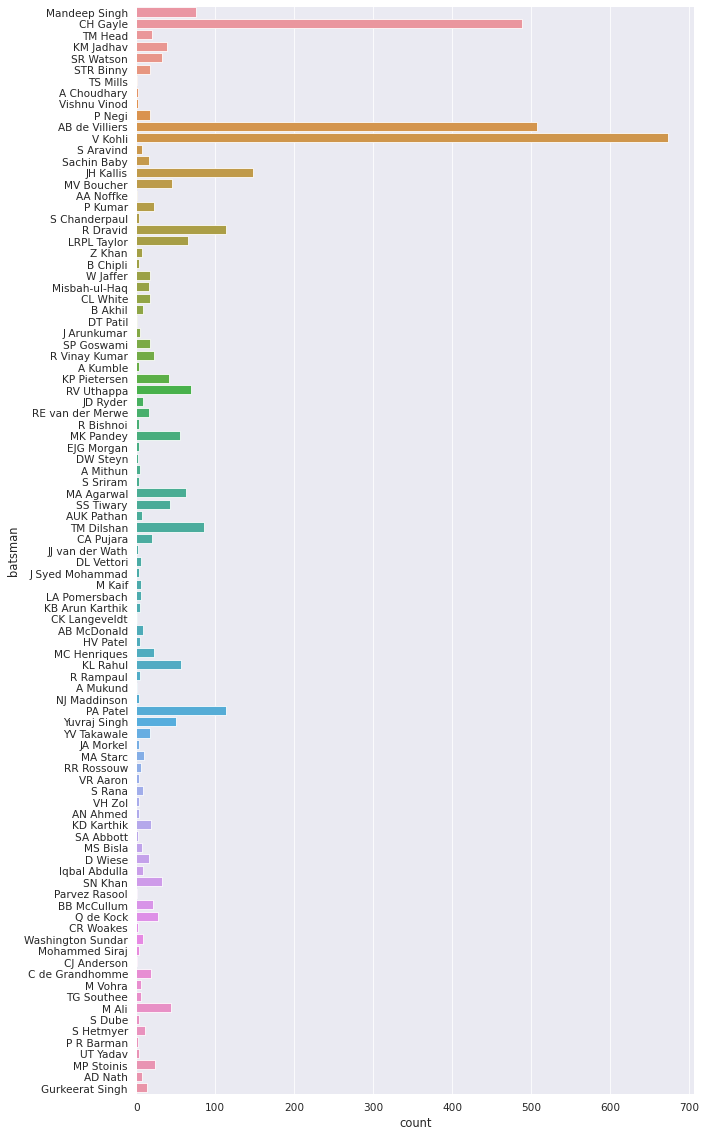

In [34]:
plt.figure(figsize=(10,20))
sns.countplot(y='batsman',data=df_boundaries)

In [35]:
df_bo=df_boundaries.groupby('batsman')['match_id'].count().reset_index()
df_bo.rename(columns={'match_id':'Boundaries'},inplace=True)

In [37]:
df_bo.sort_values('Boundaries',ascending=False)

,batsman,Boundaries
86,V Kohli,673
6,AB de Villiers,507
15,CH Gayle,489
32,JH Kallis,148
58,PA Patel,114
...,...,...
16,CJ Anderson,1
4,AA Noffke,1
3,A Mukund,1
17,CK Langeveldt,1


In [38]:

ps.area(x='batsman',y='Boundaries',data_frame=df_bo[df_bo['Boundaries']>10],color_discrete_sequence=ps.colors.qualitative.Dark2,height=600)

In [39]:

ps.histogram(data_frame=df_rcbbatting[df_rcbbatting['player_dismissed']=='V Kohli'],x='dismissal_kind',color_discrete_sequence=ps.colors.qualitative.T10)

**Most Number of wickets taken by RCB bowlers**

In [40]:
df_rcbbowling=df_rcb[df_rcb['bowling_team']=='Royal Challengers Bangalore']

In [41]:
df_rcbbowling.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN


In [42]:
df_rcbbowling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21236 entries, 0 to 177515
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_id          21236 non-null  int64 
 1   inning            21236 non-null  int64 
 2   batting_team      21236 non-null  object
 3   bowling_team      21236 non-null  object
 4   over              21236 non-null  int64 
 5   ball              21236 non-null  int64 
 6   batsman           21236 non-null  object
 7   non_striker       21236 non-null  object
 8   bowler            21236 non-null  object
 9   is_super_over     21236 non-null  int64 
 10  wide_runs         21236 non-null  int64 
 11  bye_runs          21236 non-null  int64 
 12  legbye_runs       21236 non-null  int64 
 13  noball_runs       21236 non-null  int64 
 14  penalty_runs      21236 non-null  int64 
 15  batsman_runs      21236 non-null  int64 
 16  extra_runs        21236 non-null  int64 
 17  total_runs 

In [ ]:
df_rcbbatting.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20908 entries, 125 to 177638
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_id          20908 non-null  int64 
 1   inning            20908 non-null  int64 
 2   batting_team      20908 non-null  object
 3   bowling_team      20908 non-null  object
 4   over              20908 non-null  int64 
 5   ball              20908 non-null  int64 
 6   batsman           20908 non-null  object
 7   non_striker       20908 non-null  object
 8   bowler            20908 non-null  object
 9   is_super_over     20908 non-null  int64 
 10  wide_runs         20908 non-null  int64 
 11  bye_runs          20908 non-null  int64 
 12  legbye_runs       20908 non-null  int64 
 13  noball_runs       20908 non-null  int64 
 14  penalty_runs      20908 non-null  int64 
 15  batsman_runs      20908 non-null  int64 
 16  extra_runs        20908 non-null  int64 
 17  total_run

In [43]:
no_na=df_rcbbowling.dropna()
df_iswicket=no_na[['player_dismissed','bowler']].reset_index()
df_iswicket.head()

,index,player_dismissed,bowler
0,11,DA Warner,A Choudhary
1,64,S Dhawan,STR Binny
2,94,MC Henriques,YS Chahal
3,116,Yuvraj Singh,TS Mills
4,1112,AP Tare,TS Mills


In [44]:
df_bowl=df_iswicket.groupby('bowler')['index'].count().reset_index()
df_bowl.rename(columns={'index':'Wickets'},inplace=True)

In [45]:
df_bowl.head()

,bowler,Wickets
0,A Choudhary,5
1,A Kumble,49
2,A Mithun,8
3,AA Kazi,1
4,AA Noffke,1


In [46]:
df_bowl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   bowler   73 non-null     object
 1   Wickets  73 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [47]:
df_bowl.sort_values('Wickets',ascending=False)

,bowler,Wickets
70,YS Chahal,102
52,R Vinay Kumar,83
72,Z Khan,56
1,A Kumble,49
55,S Aravind,48
...,...,...
9,Avesh Khan,1
49,Parvez Rasool,1
4,AA Noffke,1
3,AA Kazi,1


In [48]:

ps.scatter(data_frame=df_bowl[df_bowl['Wickets']>5],x='bowler',y='Wickets',height=600,color_discrete_sequence=ps.colors.qualitative.Set1)